# Retweets and Meetings in Impact Hours 
June 22, 2021 🐙

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("data/praise-data-labeled-clean-IH.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,To,From,Reason for dishing,Server,Date,Room,v1 norm,v2 norm,...,Cred per person,To.1,Room-NoEmoji,Source,Year,Month,Day,Category Code,QUESTIONS,IH_per_praise_clean
0,0,0,zeptimusQ,Tam2140,for hosting this kicking params party!,Token Engineering Commons,2021-05-07,🙏praise,10000.0,100.0,...,NaN,NaN,praise,Token Engineering Commons : praise,2021,5,7,NaN,NaN,2.355252
1,1,1,zeptimusQ,iviangita,for hosting and leading a lot of params parties,Token Engineering Commons,2021-05-07,🙏praise,10000.0,100.0,...,NaN,NaN,praise,Token Engineering Commons : praise,2021,5,7,NaN,NaN,1.995539
2,2,2,zeptimusQ,JuankBell,for testing and deploying the bot to record an...,Token Engineering Commons,2021-04-28,🙏praise,1000.0,200.0,...,NaN,NaN,praise,Token Engineering Commons : praise,2021,4,28,NaN,NaN,1.610872
3,3,3,zeptimusQ,iviangita,for the huge success of the MVV process,Token Engineering Commons,2021-04-30,🙏praise,1000.0,200.0,...,NaN,NaN,praise,Token Engineering Commons : praise,2021,4,30,TEC2,NaN,1.251160
4,4,4,zeptimusQ,iviangita,"for his awesome work on the recorder bot, for ...",Token Engineering Commons,2021-04-30,🙏praise,1000.0,200.0,...,NaN,NaN,praise,Token Engineering Commons : praise,2021,4,30,NaN,NaN,1.251160


# Analysis of Retweets

In [3]:
find_retweeting = lambda x: int("retweeting" in x.replace("-","").split())
df["retweeting"] = df["Reason for dishing"].map(find_retweeting)

In [4]:
df["retweeting"].mean()

0.1235243305499568

In [5]:
df["retweeting"].sum()

858

In [6]:
df[df["retweeting"] == 1]["IH_per_praise_clean"].mean()

0.5392439087482512

In [7]:
df[df["retweeting"] == 1]["IH_per_praise_clean"].describe()

count    858.000000
mean       0.539244
std        0.190895
min        0.267460
25%        0.371364
50%        0.518121
75%        0.713655
max        0.850973
Name: IH_per_praise_clean, dtype: float64

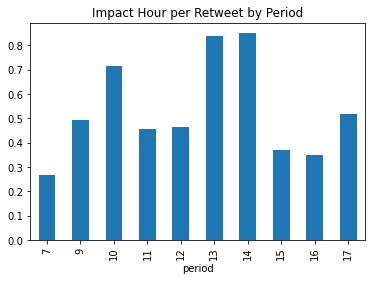

In [8]:
df[df["retweeting"] == 1].groupby("period")["IH_per_praise_clean"].mean().plot.bar()
plt.title("Impact Hour per Retweet by Period")
plt.savefig("IH for a Retweet by Period.jpg")
plt.show()

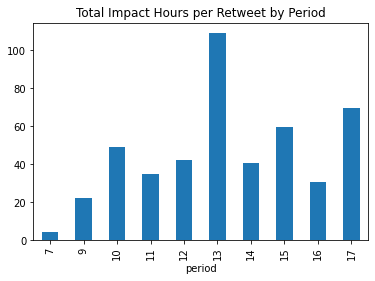

In [9]:
df[df["retweeting"] == 1].groupby("period")["IH_per_praise_clean"].sum().plot.bar()
plt.title("Total Impact Hours per Retweet by Period")
plt.savefig("Total IH for Retweets by Period.jpg")
plt.show()

In [10]:
retweets = df[df["retweeting"] == 1]
retweets["IH_per_praise_clean"].sum()/df["IH_per_praise_clean"].sum()

0.040285511542685414

Impact Hours due to retweet-praises are about 4% of all of the attributable Impact Hours during this time. 

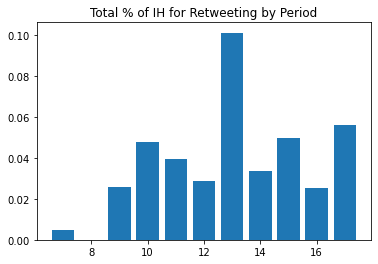

In [11]:
periods = np.unique(df["period"])

RT_IH_period = lambda p: df[(df["retweeting"] == 1) & (df["period"] == p)]["IH_per_praise_clean"].sum()
RT_IH_data = np.array([RT_IH_period(p) for p in periods])

all_IH_period = lambda p: df[df["period"] == p]["IH_per_praise_clean"].sum()
all_IH_data =np.array([all_IH_period(p) for p in periods])

RT_pct = RT_IH_data/all_IH_data
RT_pct

fig = plt.bar(x = periods, height = RT_pct)
plt.title("Total % of IH for Retweeting by Period")
plt.savefig("Pct_Retweeting.jpg")
plt.show()

In [12]:
retweets["IH_per_praise_clean"].unique().max()

0.8509730931999999

In [13]:
retweets[retweets["IH_per_praise_clean"] == retweets["IH_per_praise_clean"].max()]["period"].unique()

array([14], dtype=int64)

All of the maximum IH-values for retweeting are in Period 14, when the typical retweeting Praise received about 0.85 Impact Hours. 

## Analysis for Attending Meetings 

In [14]:
w1 = ["coming","joining","attending", "attendance", "being", "present", "presence"]
w2 = ["sync", "call", "meeting", "party", "session", "sesh"]
def find_meeting(x):
    chk1 = any([y in x for y in w1])
    chk2 = any([y in x for y in w2])
    chk = chk1 & chk2
    return chk



In [15]:
df["is_meeting"] = df["Reason for dishing"].map(find_meeting)

In [16]:
df[df["is_meeting"] == 1]["IH_per_praise_clean"].mean()

1.146764431910743

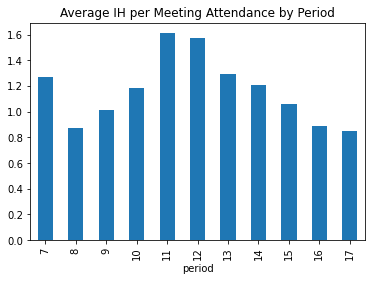

In [17]:
df[df["is_meeting"] == 1].groupby("period")["IH_per_praise_clean"].mean().plot.bar()
plt.title("Average IH per Meeting Attendance by Period")
plt.savefig("AvgIHforMeetingAttendance.jpg")
plt.show()

In [18]:
meetings = df[df["is_meeting"] == 1]
meetings["IH_per_praise_clean"].sum()/df["IH_per_praise_clean"].sum()

0.10284609011942336

In [19]:
meetings["Reason for dishing"].tolist()

['for being present in the Transparency sync call today ',
 'for joining the <#810180622634844202> bi-weekly call, with their diverse backgrounds - already creating a perfect focus group 😄 to start our research from, and making time for not just 1 but 2 work sessions until our next call ',
 'for coming to the hatch dashboard party today ',
 'for joining the Community Stewards sync yesterday. ',
 'for joining the Legal weekly sync ',
 'for joining Common Swarm weekly sync ⚡ ',
 'for joining the Comms WG call ',
 'for joining the Legal weekly call ',
 'for joining the soft gov call yesterday! ',
 'for joining Hatch Outreach call! ',
 'because the biweekly 0mega calls are becoming one of Chuys favorite spaces in the TEC ',
 'for being present in the Transparency sync call today ',
 'for joining the Legal weekly sync ',
 'for joining the Comms WG call ',
 'for joining the Legal weekly call ',
 'for joining the MVV runoff polishing session! ',
 'for joining the soft gov call yesterday! ',
 

In [20]:
meetings["IH_per_praise_clean"].describe()

count    1030.000000
mean        1.146764
std         0.779940
min         0.300574
25%         0.759184
50%         0.992222
75%         1.369335
max        15.509500
Name: IH_per_praise_clean, dtype: float64

### There are some exceptional "meeting"-related praises that encompass multiple aspects and received a large number of Impact Hours, which drives up the average. It would be cleaner if we tried to catch these, but the damage is probably minimal. 

### That large retweeting value for Period 14 highlights the variability between different periods. How many meeting praises did not receive as many Impact Hours as the maximum retweet? 

In [21]:
len(meetings[meetings["IH_per_praise_clean"] < retweets["IH_per_praise_clean"].max()])

400

In [22]:
len(meetings[meetings["IH_per_praise_clean"] < retweets["IH_per_praise_clean"].max()])/len(meetings)

0.3883495145631068

#### About 400 meeting-related praises (nearly 39% of meeting-related praises we're considering) did not receive as many Impact Hours as retweeting during Period 14. 